# The Effects of Trip Data Characteristics on Their Duration

## Investigation Overview

In this investigation

* I want to show the trip in a relation with weekdays and months.
* I will show the pie chart for user types in the trip
* I will show the distribution of the age in a relation with the duration of the trip
* I will show if Bike sharing has effect on the duration of the trip or not.
* I will show if the user type has effect on the duration according to weekdays of the trip.

## Dataset Overview

The dataset with 174952 and 22 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip,start_date,start_day,start_month,start_year,duration_min,member_age). Most variables are 11 numerical, and others are 1 datetime, 10 object type after preprocessing.

In [19]:
#import the packages used for the visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


In [20]:
# load the Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [21]:
# I will copy the dataset for changes 
dataset=df.copy()

#remove missing values
dataset.dropna(inplace=True)
dataset.isna().sum()

#split datatime into new columns
dataset['start_time']=pd.to_datetime(dataset['start_time'])
dataset['start_date']=dataset.start_time.dt.strftime('%Y-%m-%d')
dataset['start_day']=dataset.start_time.dt.strftime('%A')
dataset['start_month']=dataset.start_time.dt.strftime('%B')
dataset['start_hour']=dataset.start_time.dt.strftime('%H')

#make a conversion of both
#1- duration_sec into duration_minute to be more clear in visualization
#2- calculate age based on member_bith_year and this year(2021)

dataset['duration_min']=dataset['duration_sec']/60
dataset['member_age']=2021-dataset['member_birth_year']
dataset.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_month,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,Thursday,February,17,869.750000,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,Thursday,February,12,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,Thursday,February,17,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,February,23,26.416667,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,2019-02-28,Thursday,February,23,29.883333,62.0


In [22]:
#remove outliers from the age column
data_out=dataset[dataset['member_age']>59]
#It is a small number in a comparison of the size of dataset
# we will drop the outliers
indices=data_out.index
dataset.drop(index=indices)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_day,start_month,start_hour,duration_min,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,2019-02-28,Thursday,February,17,869.750000,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,2019-02-28,Thursday,February,12,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,2019-02-28,Thursday,February,17,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,2019-02-28,Thursday,February,23,26.416667,47.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,2019-02-28,Thursday,February,23,19.116667,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,...,Subscriber,1996.0,Male,No,2019-02-01,Friday,February,00,8.000000,25.0
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,...,Subscriber,1984.0,Male,No,2019-02-01,Friday,February,00,5.216667,37.0
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,...,Subscriber,1990.0,Male,Yes,2019-02-01,Friday,February,00,2.350000,31.0
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,...,Subscriber,1988.0,Male,No,2019-02-01,Friday,February,00,2.316667,33.0


## Visualize the weekdays and months for the trip
 I will show which day is the most frequent for the trip.

Text(0.5, 1.0, 'Frequency Vs. Day Of Trip')

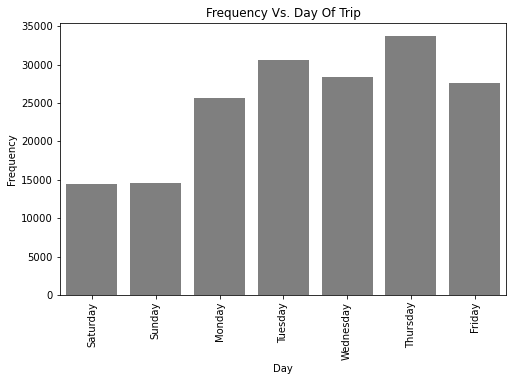

In [33]:
#counting for start day
order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']
base_color=sb.color_palette()[7]
plt.figure(figsize=[8,5])
sb.countplot(data=dataset, x='start_day',order=order,color=base_color)
plt.xticks(rotation=90)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Frequency Vs. Day Of Trip')

Well As we can notice:

* the most frequent day of all trips is Thursday

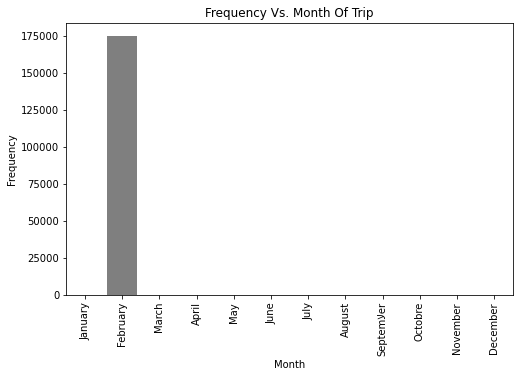

In [32]:
#Counting for start month
order=['January','February','March','April','May','June','July','August','Septemﻻer','Octobre','November','December']
color_base=sb.color_palette()[6]
plt.figure(figsize=[8,5])
sb.countplot(data=dataset, x='start_month', color=base_color,order=order);
plt.xlabel('Month');
plt.xticks(rotation=90);
plt.ylabel('Frequency');
plt.title('Frequency Vs. Month Of Trip');

We notice that 
* February Month is the begin for each trip
so, We can conclude that Thursday of February month is the suitable date for going on a trip

## Visualize The Distribution of Users and Trip Durations
Visualize the percentage of Both two user types(Customers and Subscribers)

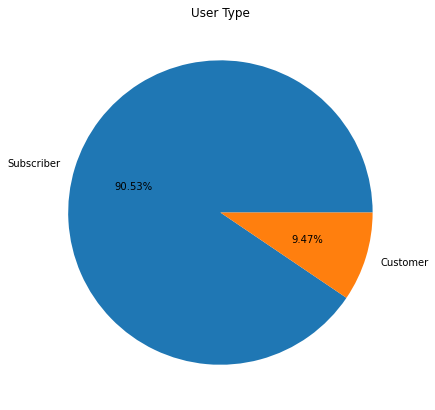

In [25]:
#Visualize the percentage of the number of customers and Subscribers
types_of_users=dataset.user_type.value_counts()
plt.figure(figsize=[10,7])
plt.pie(types_of_users,labels=types_of_users.index,autopct= '%0.2f%%')
plt.title('User Type');

## Visualize The Histogram of  Age

We can notice that the distribution is centered at the range 20 and 45 (Young users).

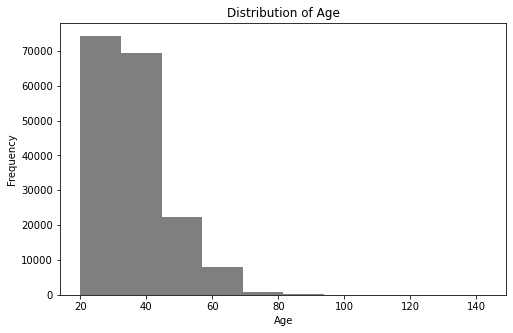

In [26]:
#visualize the age distribution for people going on the trip.
plt.figure(figsize=[8,5])
color_base=sb.color_palette()[0]
plt.hist(data = dataset, x = 'member_age',color=base_color)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Visualize The Distribution Between Trip Duration and  Age

The most frequent users aged in the range 20 and 45 have higher duration in the trip.

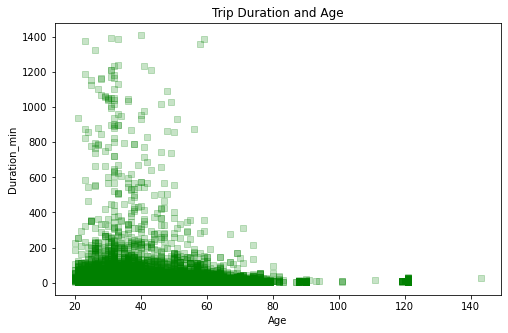

In [30]:
plt.figure(figsize=[8,5])
plt.scatter(dataset['member_age'], dataset['duration_min'], alpha = 0.22, marker = 's',color='green' )
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_min')
plt.show()

## Visualize Trip Duration and bike_share_for_all_trip
The users who do not make bike_share_for_all_trip takes little higher duration than who make bike_share_for_all_trip .

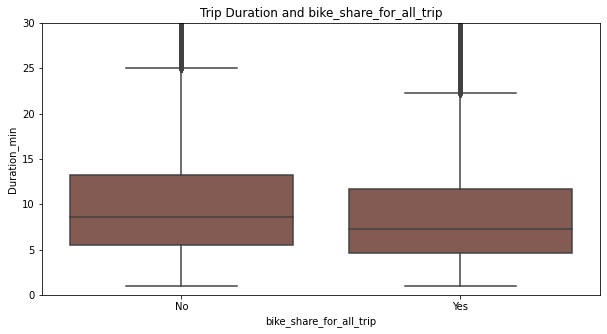

In [10]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[5]
sb.boxplot(data = dataset, x = 'bike_share_for_all_trip', y = 'duration_min', color = base_color)
plt.ylim([0, 30])
plt.title('Trip Duration and bike_share_for_all_trip')
plt.xlabel('bike_share_for_all_trip')
plt.ylabel('Duration_min')
plt.show()

## Visualize Trip Duration and Day of Week by User type

* The customers have large duration trip within days than the subscribers
* The Subscribers are almost consistent through all weekdays


Text(11.438349315241567, 0.5, 'Trip Duration in min')

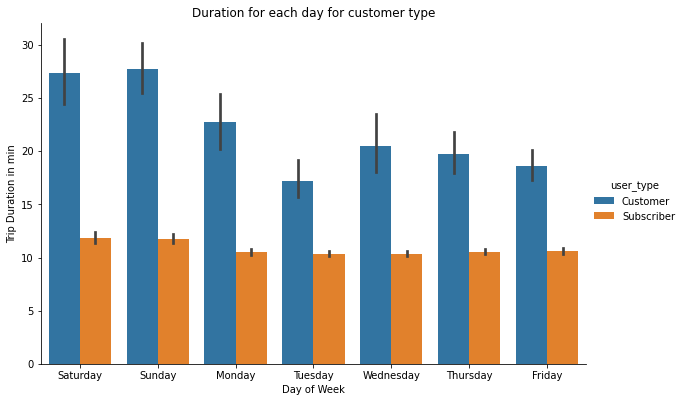

In [11]:
order=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sb.catplot(data=dataset, x='start_day', y='duration_min', hue='user_type',kind='bar',order=order,height=5.27,aspect=9.7/6.27)
plt.title('Duration for each day for customer type')
plt.xlabel('Day of Week')
plt.ylabel('Trip Duration in min')

In [12]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
!jupyter nbconvert SlideDeck_Ford_Gobike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook SlideDeck_Ford_Gobike.ipynb to slides
[NbConvertApp] Writing 699945 bytes to SlideDeck_Ford_Gobike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/SlideDeck_Ford_Gobike.slides.html
Use Control-C to stop this server
